##**TASK** **4**   **Prediction** **Using** **Decission Tree**  **ML**
#**Submitted** **By** - **Yash** **Jitendra** **Modi**

In [127]:
# !pip install --upgrade scikit-learn==0.23.1

from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report,f1_score, plot_confusion_matrix

sklearn.__version__
%matplotlib inline

# Load Data

In [101]:
#Importing the dataset

df=pd.read_csv("Iris.csv")

# Data Profile

In [102]:
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [104]:
df.drop('Id',inplace=True,axis=1)

# Data Visualisation

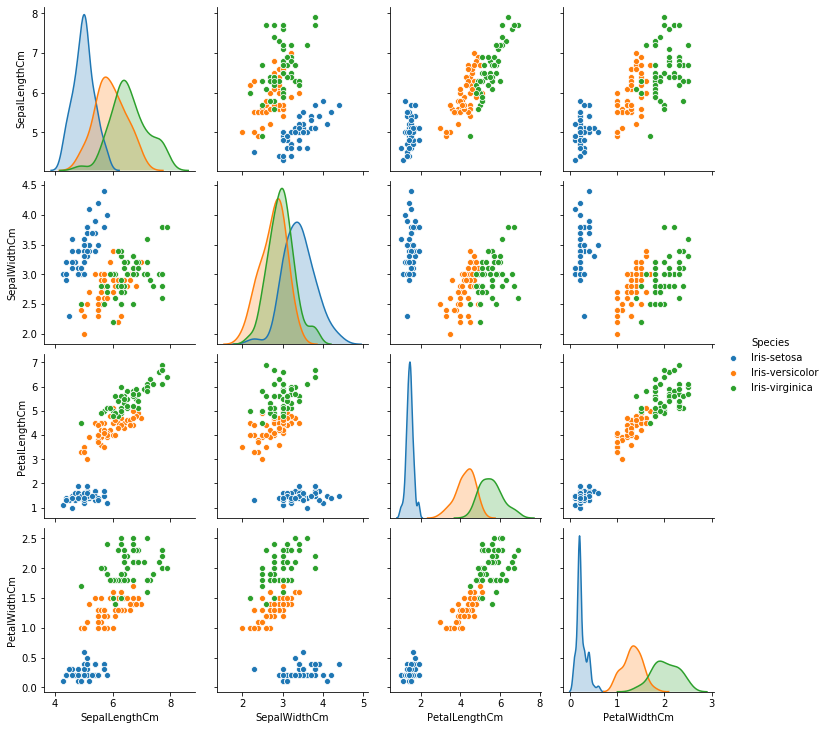

In [105]:
# dff = pd.read_csv('/Iris.csv')
import seaborn as sns
sns.pairplot(df ,hue='Species')


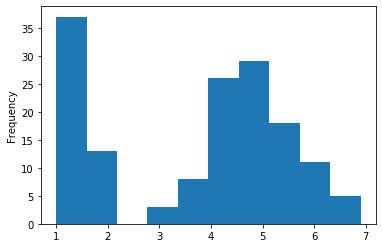

In [106]:
df['PetalLengthCm'].plot.hist()
plt.show()

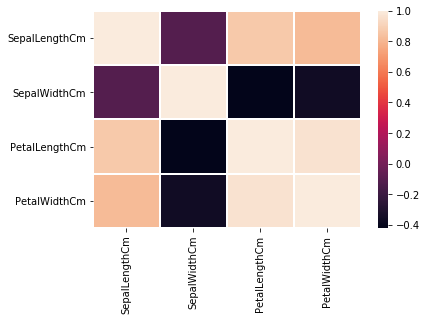

In [107]:
import seaborn as sns 
  
sns.heatmap(df.corr(), linecolor = 'white', linewidths = 1)

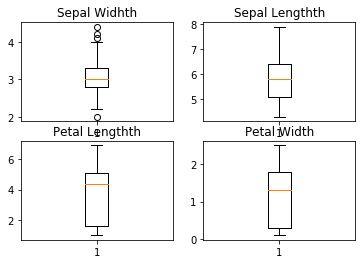

In [108]:
fig,a =  plt.subplots(2,2)
a[0][0].boxplot(df['SepalWidthCm'])
a[0][0].set_title('Sepal Widhth')
a[0][1].boxplot(df['SepalLengthCm'])
a[0][1].set_title('Sepal Lengthth')
a[1][0].boxplot(df['PetalLengthCm'])
a[1][0].set_title('Petal Lengthth')
a[1][1].boxplot(df['PetalWidthCm'])
a[1][1].set_title('Petal Width')
plt.show()

## Splitting the Data

In [109]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2020)


## Train the Algorithm using gini impuriy¶

In [110]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(criterion = 'gini')
clf.fit(x_train , y_train)
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8666666666666667

[Text(334.8, 489.24, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(167.4, 380.52000000000004, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(502.20000000000005, 380.52000000000004, 'X[3] <= 1.7\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(334.8, 271.8, 'X[2] <= 5.0\ngini = 0.091\nsamples = 42\nvalue = [0, 40, 2]'),
 Text(167.4, 163.08000000000004, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(502.20000000000005, 163.08000000000004, 'X[1] <= 2.75\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(334.8, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(669.6, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(669.6, 271.8, 'gini = 0.0\nsamples = 38\nvalue = [0, 0, 38]')]

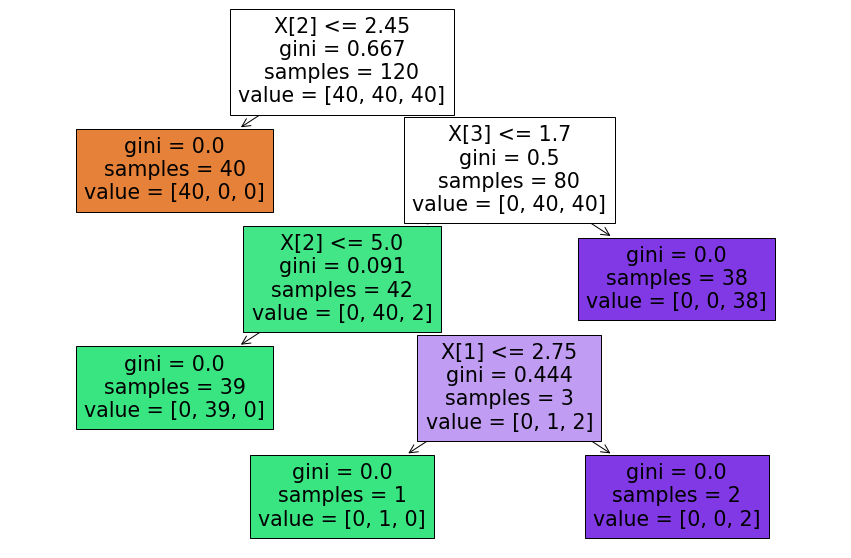

In [111]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

### Post pruning decision trees with cost complexity pruning
___The :class:DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In :class:DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.____



In [162]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.01111111, 0.02063492, 0.3015873 , 0.33333333])

In [151]:
clfs = []
train_acc=[]
test_acc=[]
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha,criterion = 'gini')
    clf.fit(x_train, y_train)
    clfs.append(clf)
    pred=clf.predict(x_test)
#     train_acc.append(accuracy_score(x_train, y_train))
    test_acc.append(accuracy_score(y_test,pred))
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3333333333333334


### Accuracy vs alpha for training and testing sets


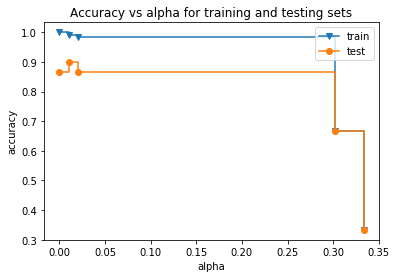

In [164]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='v', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

[0.         0.01111111 0.02063492 0.3015873  0.33333333]


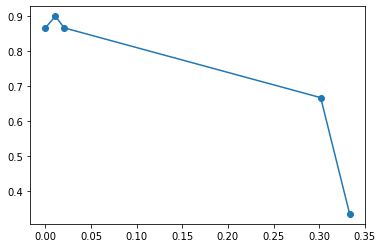

In [153]:
plt.plot(ccp_alphas,test_acc,marker='o')
print(ccp_alphas)

### Selecting the best model

In [165]:
gini_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.02063492 ,criterion = 'gini')
gini_clf.fit(x_train, y_train)
pred=gini_clf.predict(x_test)
accuracy_score(y_test,pred)

0.9

[Text(334.8, 475.65000000000003, 'X[3] <= 0.7\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(167.4, 339.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(502.20000000000005, 339.75, 'X[3] <= 1.7\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(334.8, 203.85000000000002, 'X[2] <= 5.0\ngini = 0.091\nsamples = 42\nvalue = [0, 40, 2]'),
 Text(167.4, 67.94999999999999, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(502.20000000000005, 67.94999999999999, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(669.6, 203.85000000000002, 'gini = 0.0\nsamples = 38\nvalue = [0, 0, 38]')]

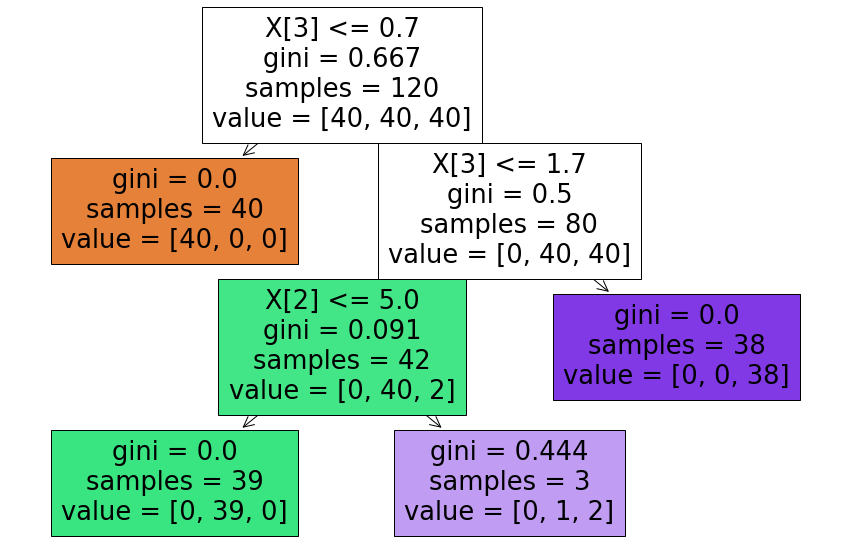

In [155]:
plt.figure(figsize=(15,10))
tree.plot_tree(gini_clf,filled=True)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.80      0.84        10
 Iris-virginica       0.82      0.90      0.86        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30

0.899749373433584


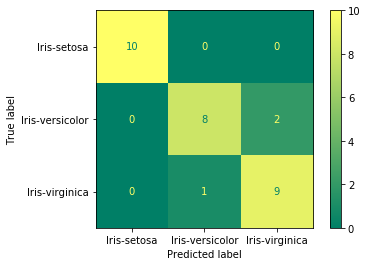

In [156]:
print(classification_report(y_test,pred))
print(f1_score(y_test,pred,average='macro'))
plot_confusion_matrix(gini_clf,x_test,y_test,cmap='summer')

## Train the algorithm using Entropy¶


In [83]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8666666666666667

[Text(334.8, 489.24, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(167.4, 380.52000000000004, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(502.20000000000005, 380.52000000000004, 'X[3] <= 1.7\nentropy = 1.0\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(334.8, 271.8, 'X[2] <= 5.0\nentropy = 0.276\nsamples = 42\nvalue = [0, 40, 2]'),
 Text(167.4, 163.08000000000004, 'entropy = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(502.20000000000005, 163.08000000000004, 'X[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(334.8, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(669.6, 54.360000000000014, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(669.6, 271.8, 'entropy = 0.0\nsamples = 38\nvalue = [0, 0, 38]')]

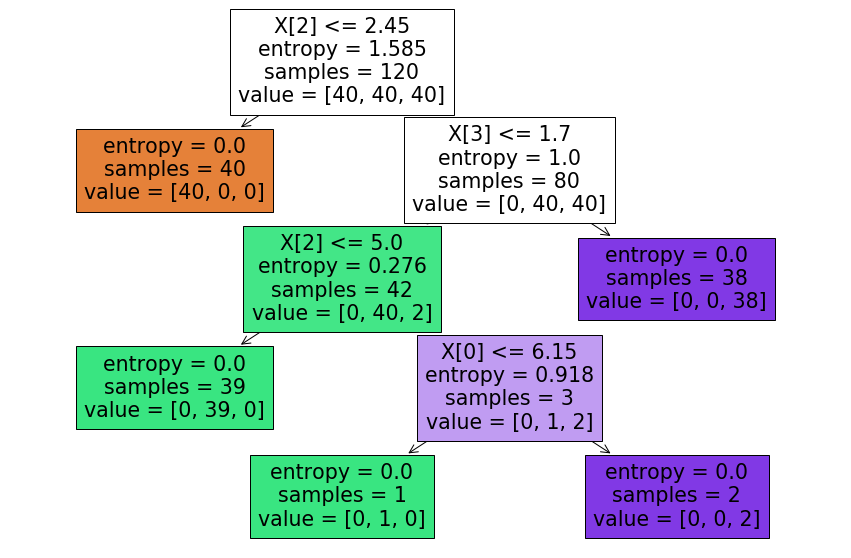

In [84]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

### Post pruning decision trees with cost complexity pruning
___The :class:DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In :class:DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.____



In [85]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [86]:
clfs = []
train_acc=[]
test_acc=[]
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha,criterion = 'entropy')
    clf.fit(x_train, y_train)
    clfs.append(clf)
    pred=clf.predict(x_test)
#     train_acc.append(accuracy_score(x_train, y_train))
    test_acc.append(accuracy_score(y_test,pred))
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.9182958340544897


### Accuracy vs alpha for training and testing sets


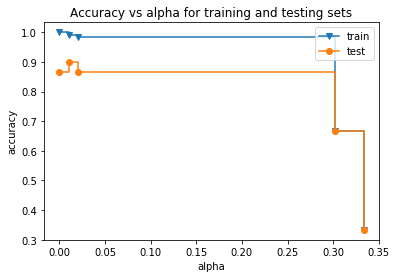

In [160]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='v', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

[0.         0.0229574  0.073711   0.56999827 0.91829583]


[0.8666666666666667,
 0.9,
 0.8666666666666667,
 0.6666666666666666,
 0.3333333333333333]

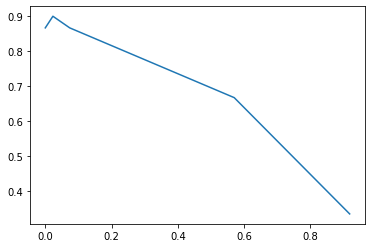

In [92]:
print(ccp_alphas)
plt.plot(ccp_alphas,test_acc)
test_acc

### Selecting the Best Model

In [161]:
e_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0229574  ,criterion = 'entropy')
e_clf.fit(x_train, y_train)
e_pred=e_clf.predict(x_test)
accuracy_score(y_test,e_pred)

0.9

[Text(334.8, 475.65000000000003, 'X[3] <= 0.7\nentropy = 1.585\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(167.4, 339.75, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(502.20000000000005, 339.75, 'X[3] <= 1.7\nentropy = 1.0\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(334.8, 203.85000000000002, 'X[2] <= 5.0\nentropy = 0.276\nsamples = 42\nvalue = [0, 40, 2]'),
 Text(167.4, 67.94999999999999, 'entropy = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(502.20000000000005, 67.94999999999999, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(669.6, 203.85000000000002, 'entropy = 0.0\nsamples = 38\nvalue = [0, 0, 38]')]

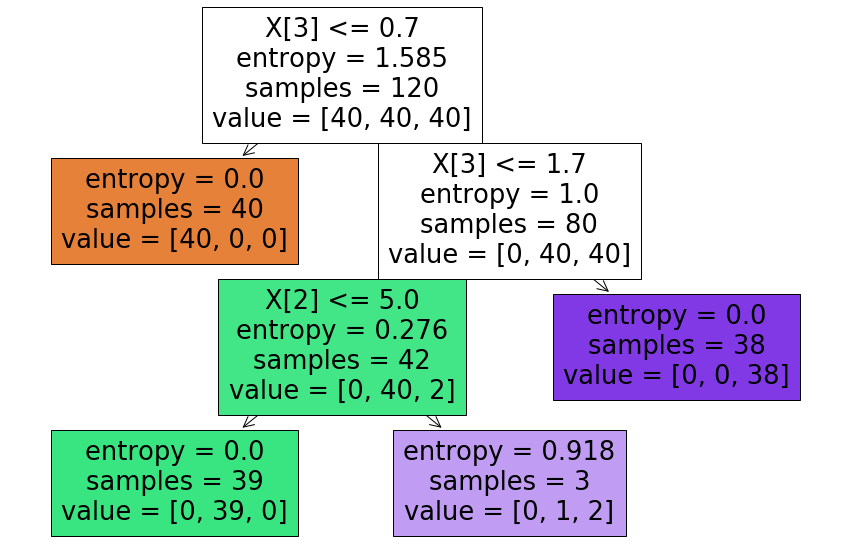

In [141]:
plt.figure(figsize=(15,10))
tree.plot_tree(e_clf,filled=True)

In [142]:
pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

In [157]:
print(classification_report(y_test,e_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.80      0.84        10
 Iris-virginica       0.82      0.90      0.86        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.80      0.84        10
 Iris-virginica       0.82      0.90      0.86        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30

0.899749373433584


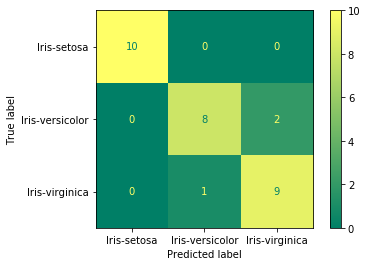

In [158]:
print(classification_report(y_test,e_pred))
print(f1_score(y_test,pred,average='macro'))
plot_confusion_matrix(e_clf,x_test,y_test,cmap='summer')

### Model 1 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0229574  ,criterion = 'entropy')
### Model 2 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha,criterion = 'gini')


## So here both model have approximately same accurac, f1_score so we can select any of the model!

### Thank You!!